# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
from tqdm import tqdm

<font color='red'>Creating custom dataset</font>

In [ ]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier using SKLearn</font>

In [ ]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))


## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>



<font color='blue'>Initialize weights </font>

In [ ]:
def initialize_weights(dim):
  w= np.array([0]*(len(dim)))                                                   #Generating a Array of zeros of size equal to the number of attributes
  b=np.array([0])                                                               #Generating a co-efficient vector of size 1
  return w,b

In [ ]:
dim=X_train[0]
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))
type(w)

w = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
b = [0]


numpy.ndarray

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [ ]:
import math
def sigmoid(z):
  a= 1/(1+math.exp(-z))                                                         #Computing the value as per the formula mentioned
  return a 

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [ ]:
def logloss(y_true,y_pred):
  loss=0                                                                                      #Initializing a variable
  
  for i in range(len(y_true)):                                                                #Looping through all the Y values 
    loss= loss+ (y_true[i])*(math.log10(y_pred[i]))+((1-y_true[i])*(math.log10(1-y_pred[i]))) #Computing the Logloss
  loss= -1*(loss/len(y_true))
  
  return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
    m= np.dot(np.transpose(w),x)                                                #Computing the dot product of the weight vector and the x vector
    s= sigmoid(m+b)                                                             #Taking the siigmoid of the result of the dot product and the co-efficient
    dw= (x*(y-s))- ((alpha/N)*w)                                                #Computing the Gradient
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [ ]:
 def gradient_db(x,y,w,b):
   m= np.dot(np.transpose(w),x)                                                 #Computing the dot product of the weight vector and the X vector
   s= sigmoid(m+b)                                                              #Taking the sigmoid value of the co-efficient and the dot product
   db= y-s                                                                      #Calculating the gradient
   return db

<font color='blue'> Implementing logistic regression</font>

In [ ]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
  
  w,b= initialize_weights(X_train[0])                                           #Initializing the weights and the intercept values to zero
  train_loss=[]                                                                 #initializing lists
  test_loss=[]

  for i in tqdm(range(epochs)):                                                       #Looping through 50 epochs
    w_g, w_b= initialize_weights(X_train[0])                                    #Initializing the weights, intercept and lists for predecting the train and test data
    pred_tr=[]
    pred_te=[]
    for j in range(len(X_train)):                                               #Looping through each row item of the Train Data
      w_g= w_g + gradient_dw(X_train[j],y_train[j],w,b,alpha,len(X_train))      #Computing the gradient of the weights and the Gradient

      w_b= w_b + gradient_db(X_train[j],y_train[j],w,b)

    w= w + (eta0*w_g)                                                           #Computing the updated weights 
    b= b + (eta0*w_b)

    for k in range(len(X_train)):                                               #Predicting the probablity of y=1 for each of the rows or observations in X_train
      t= sigmoid(b[0]+ np.dot(np.transpose(w),X_train[k]))                      #Using the formula for a generalized logistic plane y= sigmoid(b0+b1X1+b2X2+b3X3......bnXn)
      pred_tr.append(t)
    
    for l in range(len(X_test)):                                                #Predicting the probablity of y=1 for each of the rows or observations in X_test
      e= sigmoid(b[0]+ np.dot(np.transpose(w),X_test[l]))                       #Using the formula for a generalized logistic plane y= sigmoid(b0+b1X1+b2X2+b3X3......bnXn)
      pred_te.append(e)

    train_loss.append(logloss(y_train,pred_tr))                                 #leveraging the custom defined logloss function to predict the loss for train data
    test_loss.append(logloss(y_test,pred_te))                                   #leveraging the custom defined logloss function to predict the loss for test data
    
  return w,b,train_loss,test_loss 

##Experimentation with Learning Rate and the number of epochs

In [ ]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=100
w,b,trainloss,testloss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 100/100 [02:10<00:00,  1.31s/it]


In [ ]:
print('Weights Vector:',w)
print('Intercept:',b)

Weights Vector: [-0.96916963  0.6907395  -0.10883913  0.68400753 -0.44554536  1.00767742
 -0.94384833 -0.07438447  0.44375895  0.48399761  0.27346675  0.05893538
 -0.09750677  0.57160667  0.06378823]
Intercept: [-1.37237492]


In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))

In [ ]:
alpha=0.0001
eta0=0.00001
N=len(X_train)
epochs=100
w1,b1,trainloss1,testloss1=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 100/100 [02:11<00:00,  1.32s/it]


In [ ]:
alpha=0.0001
eta0=0.00005
N=len(X_train)
epochs=30
w2,b2,trainloss2,testlos2=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 30/30 [00:39<00:00,  1.32s/it]


In [ ]:
alpha=0.0001
eta0=0.00005
N=len(X_train)
epochs=25
w3,b3,trainloss3,testlos3=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 25/25 [00:33<00:00,  1.33s/it]


###Commparison between the implementation and the SGDClassifier's for various values of epochs and the learning rate

###epoch= 100, learning rate= 0.0001

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.07909779,  0.05911587, -0.03289769,  0.05293646, -0.06120161,
          0.07532498, -0.04811312, -0.00097925,  0.03784478,  0.06399851,
          0.02624533,  0.00847339, -0.0087269 ,  0.03079015, -0.00265065]]),
 array([-0.06656954]))

###epochs= 100, learning rate= 0.00001

In [ ]:
w1-clf.coef_, b1-clf.intercept_

(array([[ 0.05445406, -0.03909192,  0.02271648, -0.03578876,  0.04535519,
         -0.05226083,  0.03640019,  0.00374152, -0.02308156, -0.04441952,
         -0.01866725, -0.00434217,  0.00718801, -0.02497817,  0.00390873]]),
 array([0.0519836]))

###Observation: From the above two scenarios we see that the difference reduces with the decrease in the learning rate hence decreasing the number of epochs and margninally increasing the learning rate

###epochs= 30, learning rate= 0.00005

In [ ]:
w2-clf.coef_, b2-clf.intercept_

(array([[-2.06584069e-02,  1.62490457e-02, -7.55290666e-03,
          1.44268759e-02, -1.32423839e-02,  1.91169892e-02,
         -1.31486938e-02,  2.06675738e-04,  1.08525749e-02,
          1.57616105e-02,  6.52889919e-03,  3.01007751e-03,
         -1.89383685e-03,  7.83176919e-03, -4.43569455e-05]]),
 array([-0.01691533]))

###Observation: We see that the difference has reduced to good extent. Hence trying to reduce further. 

### Epochs= 25, Learning Rate= 0.00005 **(FINAL Hyperparameter Set)**

In [ ]:
w3-clf.coef_, b3-clf.intercept_

(array([[ 0.00472216, -0.00242757,  0.003248  , -0.0023811 ,  0.00732789,
         -0.00518658,  0.00249993,  0.00098669, -0.00077947, -0.00501204,
         -0.00203296,  0.00057679,  0.00110909, -0.00252246,  0.00120556]]),
 array([0.00520713]))

###Observation: The difference in the range of 10^-3. Hence the final set of Hyperparameters are as below

##Epochs= 25, Learning Rate= 0.00005

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

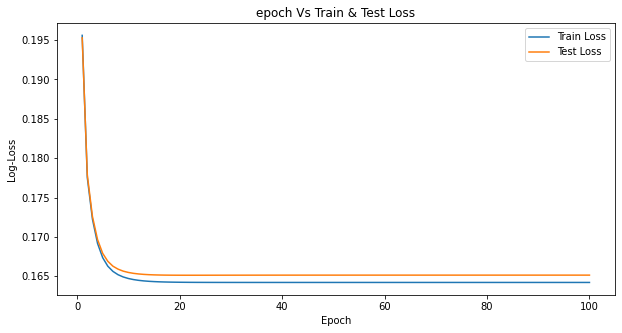

In [ ]:
plt.figure(figsize= (10,5))                                                     #Adjusting the size of the Plot
ep= list(range(1,101))                                                           #epoch values
plt.plot(ep,trainloss,label= 'Train Loss')                                      #Plotting the Training Loss
plt.plot(ep,testloss, label= "Test Loss")                                       #Plotting the Test Loss
plt.legend()                                                                    #Displaying the Legend
plt.xlabel("Epoch")                                                             #Setting the x,y labels and the Title of the Plot
plt.ylabel("Log-Loss")
plt.title("epoch Vs Train & Test Loss")
plt.show()

##Plot of the Loss for final scenario (Epochs=25, Learning Rate= 0.00005)

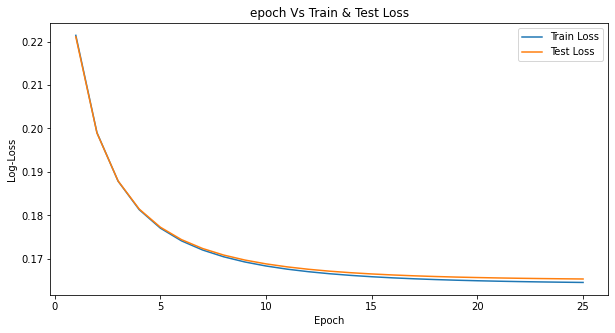

In [ ]:
plt.figure(figsize= (10,5))                                                     #Adjusting the size of the Plot
ep= list(range(1,26))                                                           #epoch values
plt.plot(ep,trainloss3,label= 'Train Loss')                                      #Plotting the Training Loss
plt.plot(ep,testlos3, label= "Test Loss")                                       #Plotting the Test Loss
plt.legend()                                                                    #Displaying the Legend
plt.xlabel("Epoch")                                                             #Setting the x,y labels and the Title of the Plot
plt.ylabel("Log-Loss")
plt.title("epoch Vs Train & Test Loss")
plt.show()

In [ ]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w3,b3,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w3,b3,X_test))/len(X_test))

0.94968
0.9468799999999999
